In [34]:
from common import Data, NWSL, Colors
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [35]:
df = Data.get_nwsl_players()
df

,name,position,birthday,country,hometown,number,height
0,Abby Dahlkemper,Defender,1993-05-13,USA,Lancaster,2.0,"5'6"""
1,Abby Elinsky,Midfielder,1996-01-08,USA,West Chester,20.0,"5'8"""
2,Abby Erceg,Defender,1989-11-20,New Zealand,Whangarei,20.0,"5'9"""
3,Abby Smith,Goalkeeper,1993-10-04,USA,Plano,4.0,"5'8"""
4,Abby Wambach,Attacker,1980-06-02,USA,NaN,NaN,"5'11"""
...,...,...,...,...,...,...,...
899,Zoe Morse,Defender,1998-04-01,USA,NaN,14.0,"5'8"""
900,Zoe Redei,Attacker,1997-10-08,USA,Atlanta,22.0,"5'4"""
901,Zoey Goralski,Defender,1995-01-22,USA,Naperville,28.0,"5'2"""
902,Zsanett Kaján,Attacker,1997-09-16,Hungary,NaN,55.0,NaN


In [36]:
df.groupby("birthday").count().sort_values(["name"], ascending=False).iloc[0:20]

,name,position,country,hometown,number,height
birthday,,,,,,
1998-05-25,2,2,2,0,2,1
1996-11-27,2,2,2,1,2,2
1991-12-03,2,2,2,2,1,2
1999-04-30,2,2,2,1,2,2
1993-05-28,2,2,2,2,2,2
1999-02-02,2,2,2,1,2,1
1989-11-09,2,2,2,0,0,2
1996-12-31,2,2,2,1,2,1
1997-10-28,2,2,2,0,2,1


In [37]:
df = (
    Data.get_nwsl_player_stats(include_early=True)[
        ["season", "date", "team", "player", "mins_played"]
    ]
    .set_index(["player"])
    .join(Data.get_nwsl_players()[["name", "birthday"]].set_index(["name"]))
)
df

,season,date,team,mins_played,birthday
player,,,,,
Abby Dahlkemper,2015,2015-04-12,WNY,86.0,1993-05-13
Abby Dahlkemper,2015,2015-04-18,WNY,77.0,1993-05-13
Abby Dahlkemper,2015,2015-05-02,WNY,90.0,1993-05-13
Abby Dahlkemper,2015,2015-05-08,WNY,90.0,1993-05-13
Abby Dahlkemper,2015,2015-05-14,WNY,90.0,1993-05-13
...,...,...,...,...,...
Évelyne Viens,2021,2021-09-25,NJNY,9.0,1997-02-06
Évelyne Viens,2021,2021-10-06,NJNY,17.0,1997-02-06
Évelyne Viens,2021,2021-10-17,NJNY,1.0,1997-02-06


In [38]:
dates = sorted(df["date"].unique())
df["date_idx"] = df["date"].apply(lambda x: dates.index(x))
df["color"] = df["team"].apply(NWSL.color)

<Figure size 16000x12800 with 0 Axes>

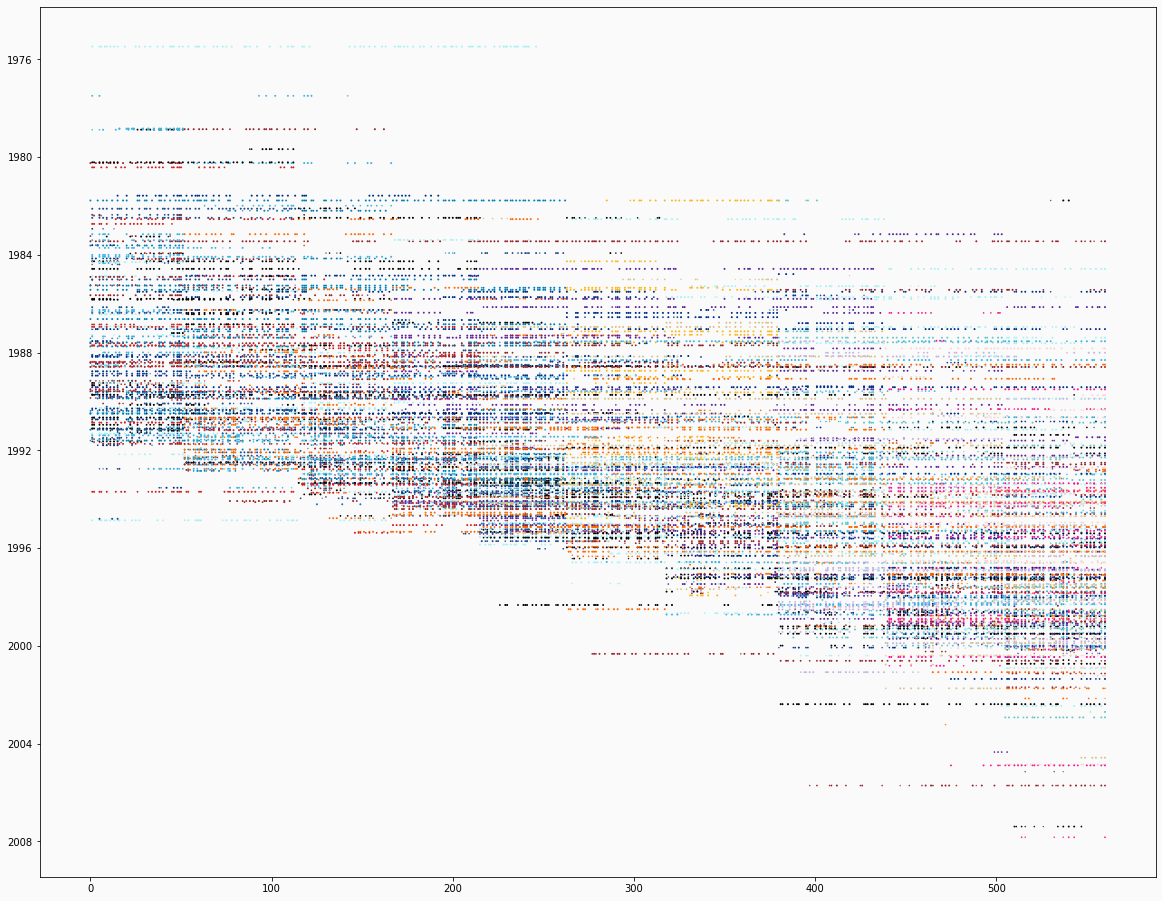

In [39]:
# Setup
plt.rcParams["figure.figsize"] = (20, 16)
plt.figure(dpi=800)
fig, ax = plt.subplots()
fig.patch.set_facecolor(Colors.WHITE)
ax.set_facecolor(Colors.WHITE)

# Plot data
ax.scatter(df["date_idx"], df["birthday"], c=df["color"], s=np.sqrt(df["mins_played"])/10)

# Handle axes
ax.invert_yaxis()

In [41]:
df[df["season"] == "2017"].sort_values("birthday", ascending=False)

,season,date,team,mins_played,birthday,date_idx,color
player,,,,,,,
Mallory Swanson,2017,2017-07-22,WAS,90.0,1998-04-29,241,#000000
Mallory Swanson,2017,2017-09-23,WAS,90.0,1998-04-29,258,#000000
Mallory Swanson,2017,2017-07-15,WAS,90.0,1998-04-29,240,#000000
Mallory Swanson,2017,2017-05-27,WAS,90.0,1998-04-29,229,#000000
Mallory Swanson,2017,2017-06-03,WAS,90.0,1998-04-29,230,#000000
...,...,...,...,...,...,...,...
Christie Pearce,2017,2017-08-04,NJNY,90.0,1975-06-24,242,#a9f1f5
Christie Pearce,2017,2017-04-23,NJNY,90.0,1975-06-24,218,#a9f1f5
Christie Pearce,2017,2017-05-24,NJNY,90.0,1975-06-24,228,#a9f1f5
